## **P-Median Problem**

Imagine that we have a set $I$ of $n$ customers and a set $J$ of $m$ potential locations for some services. We know the cost $c_{ij}$ of serving customer $i$ from location $j$. The **p-median** problem consists of choosing **p** locations for the services within the set $J$, and assigning the customers to the services, so that total cost is minimum.


To formulate the problem we use two sets of decision variables. Binary variables $x_{ij}$ that indicate whether customer $i$ is assigned to service $j$, and binary variables $y_j$ that take value 1 if we open the factory in $j$ and value 0 if we do not.

The entire linear formulation of the p-median problem would be as follows:

**Generate the model**


The problem data are randomly generated, using Euclidean distances as allocation costs.

In [ ]:
import random
import math
import matplotlib.pyplot as plt
!pip install ortools
from ortools.linear_solver import pywraplp

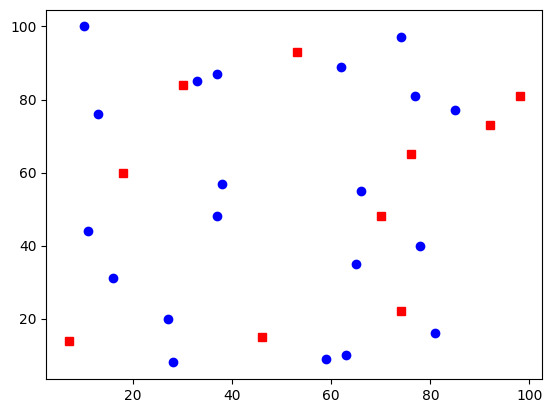

{(0, 0): 84, (0, 1): 14, (0, 2): 58, (0, 3): 52, (0, 4): 40, (0, 5): 65, (0, 6): 72, (0, 7): 81, (0, 8): 19, (0, 9): 80, (1, 0): 17, (1, 1): 72, (1, 2): 44, (1, 3): 78, (1, 4): 51, (1, 5): 33, (1, 6): 56, (1, 7): 61, (1, 8): 74, (1, 9): 7, (2, 0): 47, (2, 1): 34, (2, 2): 42, (2, 3): 45, (2, 4): 33, (2, 5): 22, (2, 6): 60, (2, 7): 69, (2, 8): 45, (2, 9): 36, (3, 0): 59, (3, 1): 27, (3, 2): 31, (3, 3): 61, (3, 4): 13, (3, 5): 53, (3, 6): 46, (3, 7): 56, (3, 8): 15, (3, 9): 60, (4, 0): 43, (4, 1): 69, (4, 2): 63, (4, 3): 62, (4, 4): 63, (4, 5): 16, (4, 6): 79, (4, 7): 85, (4, 8): 81, (4, 9): 18, (5, 0): 39, (5, 1): 42, (5, 2): 38, (5, 3): 53, (5, 4): 33, (5, 5): 20, (5, 6): 56, (5, 7): 64, (5, 8): 50, (5, 9): 28, (6, 0): 21, (6, 1): 71, (6, 2): 47, (6, 3): 75, (6, 4): 52, (6, 5): 29, (6, 6): 60, (6, 7): 65, (6, 8): 75, (6, 9): 3, (7, 0): 21, (7, 1): 86, (7, 2): 32, (7, 3): 106, (7, 4): 49, (7, 5): 67, (7, 6): 30, (7, 7): 28, (7, 8): 75, (7, 9): 45, (8, 0): 58, (8, 1): 40, (8, 2): 25, (8, 

In [12]:
EPS = 0.0001
n = 20
customers = range(n)
m = 10
locations = range(m)
p = 3
random.seed(566877)

# Coordinates of the customers and facilities on the map
customers_coor   = [(random.randint(0,100),random.randint(0,100)) for i in customers]
locations_coor   = [(random.randint(0,100),random.randint(0,100)) for j in locations]


def euclidean_distance(customers_coor, locations_coor, i, j):
    dx = customers_coor[i][0] - locations_coor[j][0]
    dy = customers_coor[i][1] - locations_coor[j][1]
    return math.floor(math.sqrt(dx*dx + dy*dy))

cost = {(i,j) : euclidean_distance(customers_coor, locations_coor, i, j) for i in customers for j in locations} # Dictionary, not list



def draw(selected):                
    plt.plot([c[0] for c in customers_coor], [c[1] for c in customers_coor], 'bo')
    plt.plot([c[0] for c in locations_coor], [c[1] for c in locations_coor], 'rs') 
    for (i,j) in selected: # Draw assignments
        plt.plot([customers_coor[i][0],locations_coor[j][0]], [customers_coor[i][1],locations_coor[j][1]], 'g-')
    plt.show()

draw({})
print(cost)

Costo total =  453.0  in  0.024 seconds

Open facility: 1

Open facility: 2

Open facility: 9

Customer 0 assigned tofacility 1.  Demand = 1. Cost = 14 

Customer 1 assigned tofacility 9.  Demand = 1. Cost = 7 

Customer 2 assigned tofacility 1.  Demand = 1. Cost = 34 

Customer 3 assigned tofacility 1.  Demand = 1. Cost = 27 

Customer 4 assigned tofacility 9.  Demand = 1. Cost = 18 

Customer 5 assigned tofacility 9.  Demand = 1. Cost = 28 

Customer 6 assigned tofacility 9.  Demand = 1. Cost = 3 

Customer 7 assigned tofacility 2.  Demand = 1. Cost = 32 

Customer 8 assigned tofacility 2.  Demand = 1. Cost = 25 

Customer 9 assigned tofacility 9.  Demand = 1. Cost = 44 

Customer 10 assigned tofacility 9.  Demand = 1. Cost = 25 

Customer 11 assigned tofacility 1.  Demand = 1. Cost = 17 

Customer 12 assigned tofacility 1.  Demand = 1. Cost = 19 

Customer 13 assigned tofacility 2.  Demand = 1. Cost = 27 

Customer 14 assigned tofacility 2.  Demand = 1. Cost = 16 

Customer 15 assig

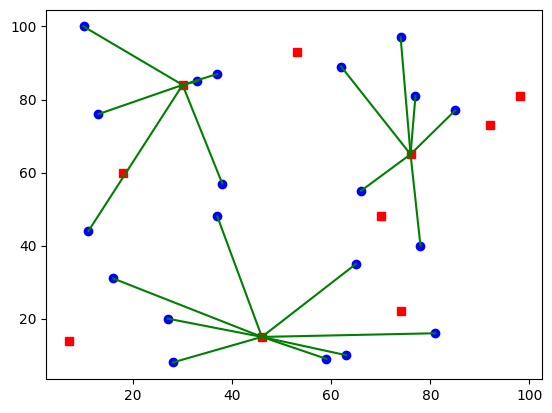

In [14]:
solver = pywraplp.Solver('ProblemaCFLPrand', pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING)

# Variables: 
# x = { (i,j) : solver.NumVar(0.0, solver.infinity(), 'x[%i, %i]' % (i, j)) for i in customers for j in locations } # continuous. Also valid
x = { (i,j) : solver.BoolVar('x[%i, %i]' % (i, j)) for i in customers for j in locations } # binary
y = { j : solver.BoolVar('y[%i]' % j) for j in locations } # binary

# Model:
solver.Minimize(solver.Sum(cost[i,j] * x[i,j] for i in customers for j in locations) )
[solver.Add(solver.Sum(x[i,j] for j in locations) == 1)  for i in customers]
[solver.Add(solver.Sum(y[j] for j in locations) == p)]
[solver.Add(x[i,j] <= y[j]) for i in customers for j in locations] 

final_status = solver.Solve()

if final_status == solver.OPTIMAL:   
    # This prints the objetive value a the optimal solition
    print('Costo total = ', solver.Objective().Value() ," in ", solver.WallTime()/1000, "seconds")

    for j in locations:
      if y[j].solution_value() > EPS:
        print('\nOpen facility: %d' % (j))

    for i in customers:
        for j in locations:
            if x[i, j].solution_value() > EPS  :
              print('\nCustomer %d assigned tofacility %d.  Demand = %g. Cost = %g ' % (i,j,x[i,j].solution_value(),cost[i,j]*x[i,j].solution_value()))

    selected = [(i,j) for i,j in cost.keys() if x[i, j].solution_value() > EPS]
    draw(selected)     


elif final_status == solver.INFEASIBLE:    
  print('PROBLEM NOT FEASIBLE')      

else:
  print('OPTIMIZATION ENDED WITH STATUS:')
  print(solver.status)  

